In [23]:

#install packages
%matplotlib inline
import pyabf
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [24]:
#check and set working directory
os.getcwd()
os.chdir('/Users/bearzhang/Desktop/Beanlab/python_ephys')
os.getcwd()

'/Users/bearzhang/Desktop/Beanlab/python_ephys'

In [25]:
#check files
len(os.listdir())

921

In [26]:
#recover stored object from %store

# -r for refreshing everything
#%store -r
# -r objname for refreshing specific variable name
#delete stored object:%store -d or %store -z delete all 
#display(df)

In [16]:
#read csv, index_col='Unnamed: 0' is to read first row as index
df = pd.read_csv('IhM.csv',index_col='Unnamed: 0')
df

,date,cellID,genotype,Cm (pF),RMP (mV),Ina at 0mV (pA),Rs (Mohms),Rin (Mohm),Ih (pA),Ih voltage (mV),M current(pA),M current voltage (mV),c(ulture)/f(ridge)/k(nown),size of neuron,comment,rheobase (pA)
18518cell3,NaN,cell3,WT,27.3,-65.2,-6904.297,11.8,170.0,"[-15.61, -46.21, -44.17, -61.65, 22.16]","[-70, -80, -90, -100, -110]","[252.16, 92.01, 31.45, -15.61]","[-40, -50, -60, -70]",c,L,NaN,NaN


In [ ]:
#write df into a csv
df.to_csv('IhM.csv')
#store everything you want to store here
%store df 
%store

In [175]:
# function to calculate downward/upward peak from a certain range(leftend,rightend)
def downpeak(trace,tp):
    '''lo, hi = input("Enter the range of peak (unit:s)(seperate by one space): ").split()
    lo = int(float(lo)*100000)
    hi = int(float(hi)*100000)'''
    #for 18501 and after:
    #lo = int(0.52*100000)
    #hi = int(0.53*100000)
    #for 18501 before
    lo = int(0.135*100000)
    hi = int(0.145*100000)
    peak = min(trace[lo:hi])
    if tp == 'VC':
        print('peak value from point',lo,'to point',hi,'is',peak,'pA')
        print('figure of voltage command and recoded current is shown below')
    else:
        print('peak value from point',lo,'to point',hi,'is',peak,'mV')
        print('figure of recorded voltage and current command is shown below')
        
    plt.figure('voltage',figsize=(15,8))
    plt.plot(time[lo:hi],voltage[lo:hi],color='k')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('voltage (mV)', fontsize=14, color='black')
    plt.title(date+cellID+'voltage at sweep'+str(SwpNm),fontsize=14, color='black')
    
    plt.figure('current',figsize=(15,8))
    plt.plot(time[lo:hi],current[lo:hi],color='r')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('current (pA)', fontsize=14, color='black')
    plt.title(date+cellID+'current at sweep'+str(SwpNm),fontsize=14, color='black')
    return(peak)


def uppeak():
    lo, hi = input("Enter the range of peak (unit s): ").split()
    peak = max(trace[lo:hi])
    peak = min(trace[lo:hi])
    if tp == 'VC':
        print('peak value from point',lo,'to point',hi,'is',peak,'pA')
        print('figure of voltage command and recoded current is shown below')
    else:
        print('peak value from point',lo,'to point',hi,'is',peak,'mV')
        print('figure of recorded voltage and current command is shown below')
        
    plt.figure('voltage',figsize=(15,8))
    plt.plot(time[lo:hi],voltage[lo:hi],color='k')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('voltage (mV)', fontsize=14, color='black')
    plt.title('voltage at sweep'+str(SwpNm),fontsize=14, color='black')
    
    plt.figure('current',figsize=(15,8))
    plt.plot(time[lo:high],current[lo:high],color='b')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('current (pA)', fontsize=14, color='black')
    plt.title('current at sweep'+str(SwpNm),fontsize=14, color='black')
    return(peak)

# this block make a function for calculate the amplitude difference between two ranges of a trace (average(leftrange)-average(rightrange))
# for VC mode, trace0: current recorded; trace1: voltage command
def diff(trace0,trace1):
    rlo, rhi = input("Enter the range of right end range (unit:s)(seperate by one space): ").split()
    llo, lhi = input("Enter the range of left end range (unit:s)(seperate by one space): ").split()
    rlo = int(float(rlo)*100000)
    rhi = int(float(rhi)*100000)
    llo = int(float(llo)*100000)
    lhi = int(float(lhi)*100000)
    
    diff0 = sum(trace0[llo:lhi])/len(trace0[llo:lhi]) - sum(trace0[rlo:rhi])/len(trace0[rlo:rhi])
    diff0 = round(diff0,2)
    ave1 = sum(trace1[llo:lhi]+trace1[rlo:rhi])/len(trace1[llo:lhi]+trace1[rlo:rhi])
    print('amplitude difference between two ranges in trace0 is ', diff0)
    print('the average command of two ranges in trace1 is', ave1)
    return(diff0,ave1)

def diffIhM(trace0,llo,lhi,rlo,rhi):
    
    diff0 = sum(trace0[llo:lhi])/len(trace0[llo:lhi]) - sum(trace0[rlo:rhi])/len(trace0[rlo:rhi])
    diff0 = round(diff0,2)

    #ave1 = 0.5*(sum(trace1[llo:lhi])/len(trace1[llo:lhi])+sum(trace1[rlo:rhi])/len(trace1[rlo:rhi]))
    #print('amplitude difference between two ranges in trace0 is ', diff0)
    #print('the average command of two ranges in trace1 is', ave1)
    return(diff0)


In [29]:
#make a list of all the features
colname = ['date','cellID','genotype','Cm (pF)','RMP (mV)','Ina at 0mV (pA)','Rs (Mohms)','Rin (Mohm)','Ih (pA)','Ih voltage (mV)','M current(pA)','M current voltage (mV)','c(ulture)/f(ridge)/k(nown)','size of neuron','comment','rheobase (pA)']
colname 

['date',
 'cellID',
 'genotype',
 'Cm (pF)',
 'RMP (mV)',
 'Ina at 0mV (pA)',
 'Rs (Mohms)',
 'Rin (Mohm)',
 'Ih (pA)',
 'Ih voltage (mV)',
 'M current(pA)',
 'M current voltage (mV)',
 'c(ulture)/f(ridge)/k(nown)',
 'size of neuron',
 'comment',
 'rheobase (pA)']

In [ ]:
#create a new dataframe, if df already exists, skip this block
#df = pd.DataFrame(columns = colname)
#df

In [232]:
#!add new cell: use this block to add new cells to the existing df
#import data
#pls no quotes when enter the name of the file
brkthru = input('Enter the name of breakthru file: ')
brkthru = pyabf.ABF(brkthru+'.abf')

#brkthru.info()
#extract file info
date = brkthru.ID[:5]
print('date of this abf is',date)
swpcnt = brkthru.sweepCount
print('total sweep count of this file is ',swpcnt)
pntnm = brkthru.pointsPerSweep
print('number of points per sweep is ', pntnm)

cellID = input('Enter the cellID of this file: (enter a number)')#pls enter a number not 'cellnumber'
cellID = 'cell' + cellID
print('cell ID is',cellID)
genotype = input('Enter the genotype of the animal: ')
print('the cell is from',genotype,'animal')
state = input('Is this cell cultured_c or fridged_f overnight or not known_k?')
print('this cell is',state, 'overnight')
#Cm is calculated using IgoR swp619x_b, RsBrkThru, Epoch2:-70 to -75 for 10 ms each
Cm = input('what is the Cm of the cell? unit pF')
print('the membrane capacitance of the cell is', Cm,'pF')
#Rs is calculated using IgoR swp619x_b, RsBrkThru, Epoch2:-70 to -75 for 10 ms each
Rs = input('what is the Rs fo the cell? unit Mohms')
print('the series resistance of the cell is', Rs,'Mohms')
#Rin is calculated using IgoR swp619x_b, RsBrkThru, Epoch2:-70 to -75 for 10 ms each
Rin = input('what is the Rin of the cell? unit Gohms')
SwpNm = input('Enter the number of the sweep of interest')
brkthru.setSweep(int(SwpNm)-1)#in python sweeps numbers start at 0, IgoR at 1
current = brkthru.dataY
voltage = brkthru.dataC
time = brkthru.dataX
peak = downpeak(current,'VC')
print('Ina at 0mV (pA) is',peak,'pA')
print('the input resistance of the cell is', float(Rin)*1000,'Mohms')
#RMP is calculated use IgoR swp619x_b, Vrest, average 3 sweeps starting from the brkthru sweep
RMP = input('what is RMP? unit mV')
print('the resting membrane potential of the cell is(before liquid junction potential correction)', RMP,'mV')
size = input('is the cell large or small DRG neuron? or unknown')
print('the neuron is ', size, 'drg neuron')
com = input('add comments to this file:')
print('comment added:', com)


#calculate Ina at break thru and add it to the df,here use downpeak()

#create NEW a dataframe
#create all of the colums(features)
#colname = ['date','cellID','genotype','Cm (pF)','RMP (mV)','Ina at 0mV (pA)','Rs (Mohms)','Rin (Mohm)','Ih (pA)','Ih voltage (mV)','M current(pA)','M current voltage (mV)','c(ulture)/f(ridge)/k(nown)','size of neuron']
##a new dataframe. If not specified, each cell in the df is filled with NaN

dfnew = pd.DataFrame(columns=colname,index=[date+cellID])#notice the brackets around 0 to prevent * to be multiplication
##fill each cell in df
dfnew.loc[date+cellID,'cellID']=cellID
dfnew.loc[date+cellID,'c(ulture)/f(ridge)/k(nown)']=state
dfnew.loc[date+cellID,'Cm (pF)']=Cm
dfnew.loc[date+cellID,'Rs (Mohms)']=Rs
dfnew.loc[date+cellID,'RMP (mV)']=RMP
dfnew.loc[date+cellID,'Rin (Mohm)']=float(Rin)*1000
dfnew.loc[date+cellID,'size of neuron']=size
dfnew.loc[date+cellID,'genotype']=genotype
dfnew.loc[date+cellID,'Ina at 0mV (pA)']=peak
dfnew.loc[date+cellID,'comment']=com
dfnew.loc[date+cellID,'date']=date
dfnewcopy = dfnew#make a copy for NEW dataframe

df = df.append(dfnew)
dfcopy = df
display(df.tail(3))

choice = input('Do you want to keep the newly added info(y/n)?:')
if choice == 'n':
    df = df[:-1]
    dfcopy = df
print('after decision,now, last 3 rows of df is')
display(df.tail(3))

KeyboardInterrupt: 

In [224]:
display(df.tail(5))

,date,cellID,genotype,Cm (pF),RMP (mV),Ina at 0mV (pA),Rs (Mohms),Rin (Mohm),Ih (pA),Ih voltage (mV),M current(pA),M current voltage (mV),c(ulture)/f(ridge)/k(nown),size of neuron,comment,rheobase (pA)
18409cell1,18409,cell1,WT,64.9,-61.4,-2453,3.3,20,"[-31.12, 16.19, 93.01, 200.85, 268.29]","[-70, -80, -90, -100, -110]","[67.88, 67.13, 31.13, -31.12]","[-40, -50, -60, -70]",u,l,,NaN
18409cell2,18409,cell2,WT,52.8,-57.3,-9926.15,4.6,230,"[-31.12, 16.19, 93.01, 200.85, 268.29]","[-70, -80, -90, -100, -110]","[67.88, 67.13, 31.13, -31.12]","[-40, -50, -60, -70]",u,l,,NaN
18409cell3,18409,cell3,WT,74.1,-46.9,-894.775,4.4,120,"[-1.15, 18.98, 29.6, 45.38, 95.29]","[-70, -80, -90, -100, -110]","[54.47, 64.22, 12.98, -1.15]","[-40, -50, -60, -70]",u,l,,NaN
18406cell9,18406,cell9,WT,112.6,-48.8,-12013.5,9.7,40,"[309.41, 540.08, 818.19, 1065.99, 1170.12]","[-70, -80, -90, -100, -110]","[18.36, 42.92, 100.64, 309.41]","[-40, -50, -60, -70]",u,l,Cmnotperfectfit,NaN
18406cell10,18406,cell10,WT,141.6,-49.8,-9320.68,8.7,30,NaN,NaN,NaN,NaN,u,l,,NaN


In [231]:
# This block is for filling Ih/M current and their voltage command
Ih = input('Enter the file name of Ih :')#this file also includes the M current info
#pls no quotes or no '.abf' when enter the name of the file
Ih = pyabf.ABF(Ih+'.abf')
#brkthru.info()
#extract file info
date = Ih.ID[:5]
print('date of this abf is',date)
swpcnt = Ih.sweepCount
print('total sweep count of this file is ',swpcnt)
pntnm = Ih.pointsPerSweep
print('number of points per sweep is ', pntnm)

cellID = input('Enter the cellID of this file: (enter a number)')#pls enter a number not 'cellnumber'
cellID = 'cell' + cellID

#create an empty list for VC output
IhMcurlist = []

#create list for voltage command
IhMV = [-40,-50,-60,-70,-80,-90,-100,-110]
IhV = IhMV[3:]
IhV
MV = IhMV[:4]
MV#here define M voltage as -40 to -70(included), Ih voltage as -70 to -110(included)

# llo and lhi depends on tau,if not specified in comments, llo = 0.28, lhi = 0.29
lchoice = input("use 0.28 0.29 as left range: 'y' or 'n'")
if lchoice == 'y':
    llo = 0.28
    lhi = 0.29
elif lchoice == 'n':
    llo, lhi = input("Enter the range of left end range (unit:s)(seperate by one space): ").split()
    com = com+' ;'+'llo is'+llo+'lhi'+lhi+' ;'
else:
    print('pls make up your mind about left range!')

#add comment
com = com + input('add comments to this file:')
print('comment added:', com)
df.loc[date+cellID,'comment']=com

#1.24 1.25 in this case
rlo = 1.24
rhi = 1.25
#rlo, rhi = input("Enter the range of right end range (unit:s)(seperate by one space): ").split()
print('amplitude difference is calculated as average from {}s to {}s minus average from{}s to {}s'.format(llo, lhi,rlo,rhi))
rlo = int(float(rlo)*100000)
rhi = int(float(rhi)*100000)
llo = int(float(llo)*100000)
lhi = int(float(lhi)*100000)
for i in range(swpcnt):#?This for loop failed to read voltage somehow,find out later
    Ih.setSweep(i)
    current=Ih.dataY
    ampdiff=diffIhM(current,llo,lhi,rlo,rhi)
    IhMcurlist.append(ampdiff)

#extract Ih info from IhMcurlist
Ihlist = IhMcurlist[3:]
Mlist = IhMcurlist[:4]

#add Ihlist,IhV,Mlist,MV into df
df = df.astype('object')
df.loc[date+cellID,'Ih (pA)'] = Ihlist
df.loc[date+cellID,'Ih voltage (mV)'] = IhV
df.loc[date+cellID,'M current(pA)'] = Mlist
df.loc[date+cellID,'M current voltage (mV)'] = MV
display(df.tail(3))

#decide if want to keep the added data
choice = input('Do you want to keep the newly added info(y/n)?:')
if choice == 'n':
    df.loc[date+cellID,'Ih (pA)'] = np.nan
    df.loc[date+cellID,'M current(pA)'] = np.nan
    dfcopy = df
print('after decision,now, last 3 rows of df are')
display(df.tail(3))




Enter the file name of Ih :18406059
date of this abf is 18406
total sweep count of this file is  8
number of points per sweep is  350000
Enter the cellID of this file: (enter a number)15
use 0.28 0.29 as left range: 'y' or 'n'y
add comments to this file:
comment added: 
amplitude difference is calculated as average from 0.28s to 0.29s minus average from1.24s to 1.25s


,date,cellID,genotype,Cm (pF),RMP (mV),Ina at 0mV (pA),Rs (Mohms),Rin (Mohm),Ih (pA),Ih voltage (mV),M current(pA),M current voltage (mV),c(ulture)/f(ridge)/k(nown),size of neuron,comment,rheobase (pA)
18406cell10,18406,cell10,WT,141.6,-49.8,-9320.68,8.7,30,"[466.36, 910.89, 1376.91, 1960.22, 2438.34]","[-70, -80, -90, -100, -110]","[-19.74, 14.91, 135.3, 466.36]","[-40, -50, -60, -70]",u,l,ICleaky,NaN
18406cell11,18406,cell11,WT,72.3,-47.2,-12977.3,5.5,40,"[40.95, 164.7, 324.62, 509.6, 695.67]","[-70, -80, -90, -100, -110]","[19.55, 3.82, -17.46, 40.95]","[-40, -50, -60, -70]",u,l,,NaN
18406cell15,18406,cell15,WT,123.3,-46.9,-7512.82,11.9,40,"[-81.72, 175.12, 544.39, 945.78, 1352.6]","[-70, -80, -90, -100, -110]","[46.32, -19.54, -108.24, -81.72]","[-40, -50, -60, -70]",u,l,,NaN


Do you want to keep the newly added info(y/n)?:y
after decision,now, last 3 rows of df are


,date,cellID,genotype,Cm (pF),RMP (mV),Ina at 0mV (pA),Rs (Mohms),Rin (Mohm),Ih (pA),Ih voltage (mV),M current(pA),M current voltage (mV),c(ulture)/f(ridge)/k(nown),size of neuron,comment,rheobase (pA)
18406cell10,18406,cell10,WT,141.6,-49.8,-9320.68,8.7,30,"[466.36, 910.89, 1376.91, 1960.22, 2438.34]","[-70, -80, -90, -100, -110]","[-19.74, 14.91, 135.3, 466.36]","[-40, -50, -60, -70]",u,l,ICleaky,NaN
18406cell11,18406,cell11,WT,72.3,-47.2,-12977.3,5.5,40,"[40.95, 164.7, 324.62, 509.6, 695.67]","[-70, -80, -90, -100, -110]","[19.55, 3.82, -17.46, 40.95]","[-40, -50, -60, -70]",u,l,,NaN
18406cell15,18406,cell15,WT,123.3,-46.9,-7512.82,11.9,40,"[-81.72, 175.12, 544.39, 945.78, 1352.6]","[-70, -80, -90, -100, -110]","[46.32, -19.54, -108.24, -81.72]","[-40, -50, -60, -70]",u,l,,NaN


In [242]:
#write a csv to path
path = '/Users/bearzhang/Desktop/Beanlab/py/'
df.to_csv(os.path.join(path,'IhM.csv'))

#store everything you want to store here
%store df 
%store

Stored 'df' (DataFrame)
Stored variables and their in-db values:
df             ->               date  cellID genotype Cm (pF) RMP (m


In [234]:
#df = df[:-1]
#this block is created to examine and modify df,dfnew,dfcopy,dfnewcopy
#df.shape:dimension of df
df.shape
#get row names in a list: list(df.index)
#list(df.index)
#get col names in a list: list(df)
#list(df)
#display(df.tail(5))
#display(df)

(48, 16)

In [1018]:
#add comments to table
df.loc['','comment'] = ''

In [ ]:
#here we choose the cell by the following criteria: RMP<-45mV, Rs<?, Cm>?, Ina at 0mV >.
#also, any file with holding current at ? mV larger than? pA must be discarded because the cells become very leaky. 



Text(0.5,1,'Ih')

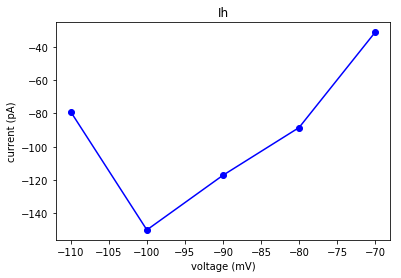

In [957]:
#this block is to plot Ih with matplotlib
#notice parameters: marker for point shape
plt.plot(df.loc['18518cell3','Ih voltage (mV)'],df.loc['18518cell3','Ih (pA)'], marker='o', color='b')
plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.title('Ih')



In [961]:
colname

['date',
 'cellID',
 'genotype',
 'Cm (pF)',
 'RMP (mV)',
 'Ina at 0mV (pA)',
 'Rs (Mohms)',
 'Rin (Mohm)',
 'Ih (pA)',
 'Ih voltage (mV)',
 'M current(pA)',
 'M current voltage (mV)',
 'c(ulture)/f(ridge)/k(nown)',
 'size of neuron']

Text(0.5,1,'M')

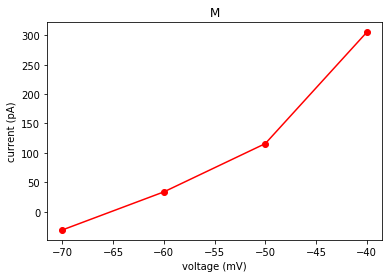

In [964]:
#this block is to plot M with matplotlib
plt.plot(df.loc['18518cell3','M current voltage (mV)'],df.loc['18518cell3','M current(pA)'], marker='o', color='r')
plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.title('M')

In [ ]:
# save this notebook, csv form into the github repoirtore


In [ ]:
# This block is to plot an interactive scatter plot use R, plotly package. 
#By now, I found plotly in R is more useful than python.

'''
#install R rpy2
#!conda install --yes --prefix {sys.prefix} rpy2
#%load_ext rpy2.ipython
%R require(ggplot2)
%R require(plotly)
#R import data from python
%%R -i df'''


In [ ]:
#decide a sweep you want to work on and show the swp ,given
SwpNm = int(input('Enter the number of sweep you are interested in: '+'from '+brkthru.ID+cellID))
brkthru.setSweep(SwpNm-1) #in python sweeps numbers start at 0, IgoR at 1
voltage=brkthru.dataC
time=brkthru.dataX
current=brkthru.dataY

plt.figure('voltage',figsize=(15,8))
plt.plot(time,voltage, color = 'k')
plt.xlabel('time (s)', fontsize=14, color='black')
plt.ylabel('command (mV)', fontsize=14, color='black')
plt.title(date+cellID+'voltage at sweep'+str(SwpNm),fontsize=14, color='black')

plt.figure('Ina at 0mV current',figsize=(15,8))
plt.plot(time,current, color ='r')
plt.xlabel('time (s)', fontsize=14, color='black')
plt.ylabel('current (pA)', fontsize=14, color='black')
plt.title(date+cellID+'current at sweep'+str(SwpNm),fontsize=14, color='black')